In [4]:
library (lubridate)
library (dplyr)
library (ggplot2)
library (tidyr)
unltickets <- read.csv("Data/tickets.csv", na.string = "NA")
head (unltickets)

Citation,Date,Location,Violation
15078429,2012-04-02 07:15:00,North Stadium,Expired Meter
24048318,2012-04-02 07:22:00,Housing,No Valid Permit Displayed
24048320,2012-04-02 07:26:00,14th & W Street,No Valid Permit Displayed
15078430,2012-04-02 07:36:00,Champions Club,Parking in Unauthorized Area
18074937,2012-04-02 07:39:00,Sandoz,Expired Meter
18074938,2012-04-02 07:40:00,Sandoz,Expired Meter


In [5]:
unltickets5 <- unltickets %>% group_by(Violation) %>%
summarize(
        count = n()
    ) %>% 
top_n(5)
arrange(desc(count)) 

Selecting by count
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'closure'”

ERROR: Error in x[!nas]: object of type 'closure' is not subsettable


In [6]:
head (unltickets5)

Violation,count
Displaying Altered Permit,23280
Expired Meter,45072
No Parking Area,3126
No Valid Permit Displayed,59743
Parking in Unauthorized Area,23131


In [8]:
head (unltickets)

Citation,Date,Location,Violation
15078429,2012-04-02 07:15:00,North Stadium,Expired Meter
24048318,2012-04-02 07:22:00,Housing,No Valid Permit Displayed
24048320,2012-04-02 07:26:00,14th & W Street,No Valid Permit Displayed
15078430,2012-04-02 07:36:00,Champions Club,Parking in Unauthorized Area
18074937,2012-04-02 07:39:00,Sandoz,Expired Meter
18074938,2012-04-02 07:40:00,Sandoz,Expired Meter


In [11]:
unlticketsbymonth <- unltickets %>% mutate(
    cleandate = ymd_hms(Date),
    month = floor_date(cleandate, "month"),
    sortedviolation=ifelse(Violation == "Displaying Altered Permit" | Violation == "No Valid Permit Displayed" | Violation == "Expired Meter", "Violation1", "Others"),
) %>% group_by(month, Violation) %>% summarize(
    count = n()
    )



In [12]:
head(unlticketsbymonth)

month,Violation,count
2012-04-01,Displaying Altered Permit,1072
2012-04-01,Displaying Counterfeit Permit,1
2012-04-01,Expired Meter,1234
2012-04-01,Failure to Reg. Veh to Permit,5
2012-04-01,False Lost/Stolen Permit Rept,32
2012-04-01,Fire Lane No Parking,4


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


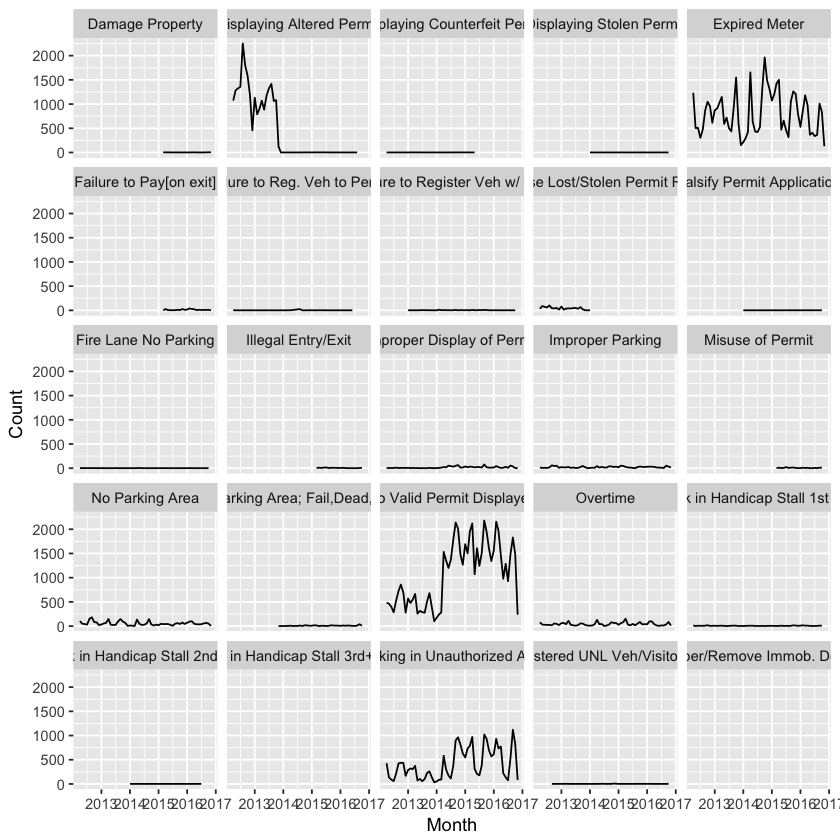

In [13]:
ggplot(unlticketsbymonth, aes(x=month, y=count)) +
   geom_line() + labs(x="Month", y="Count") + facet_wrap(~Violation)